In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


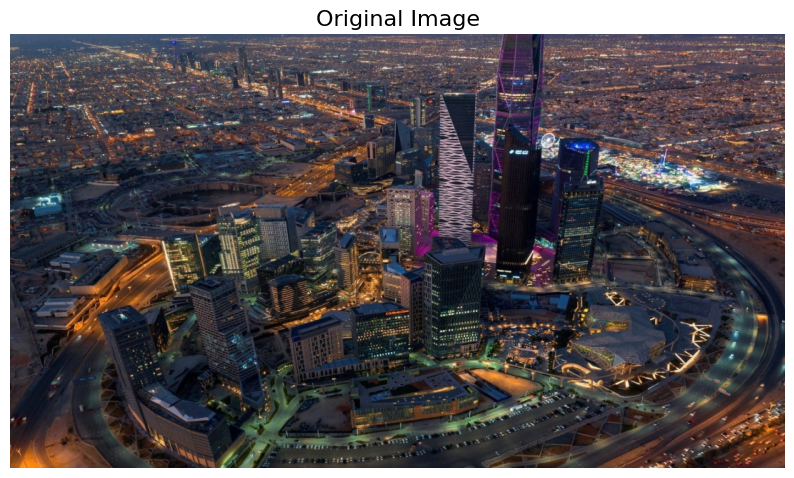

In [24]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/Colab Notebooks/king abdullah financial district.png"

image = cv2.imread(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image", fontsize=16)
plt.show()


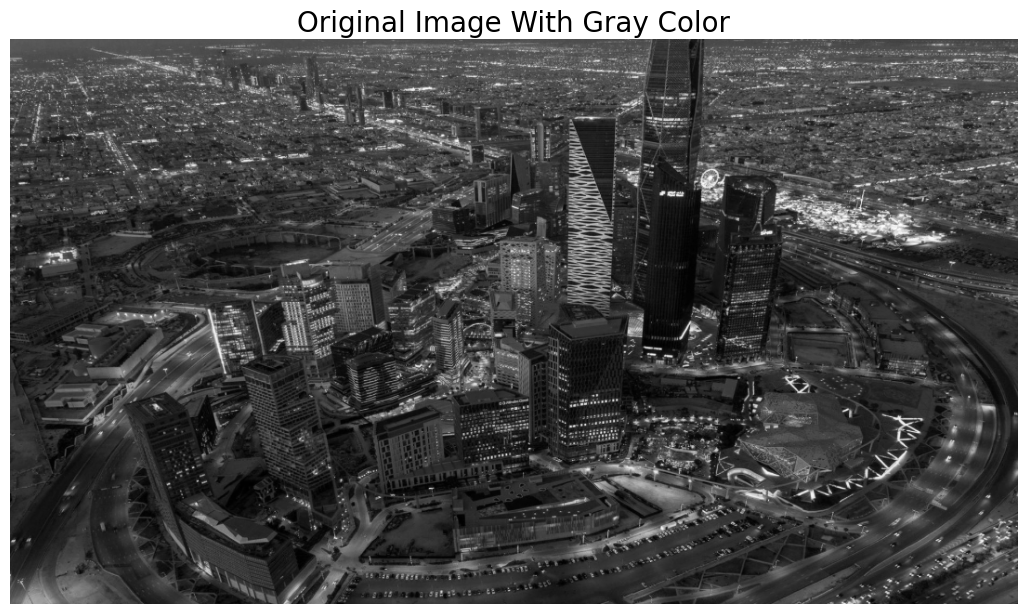

In [25]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(13, 13))
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original Image With Gray Color", fontsize=20)
plt.show()


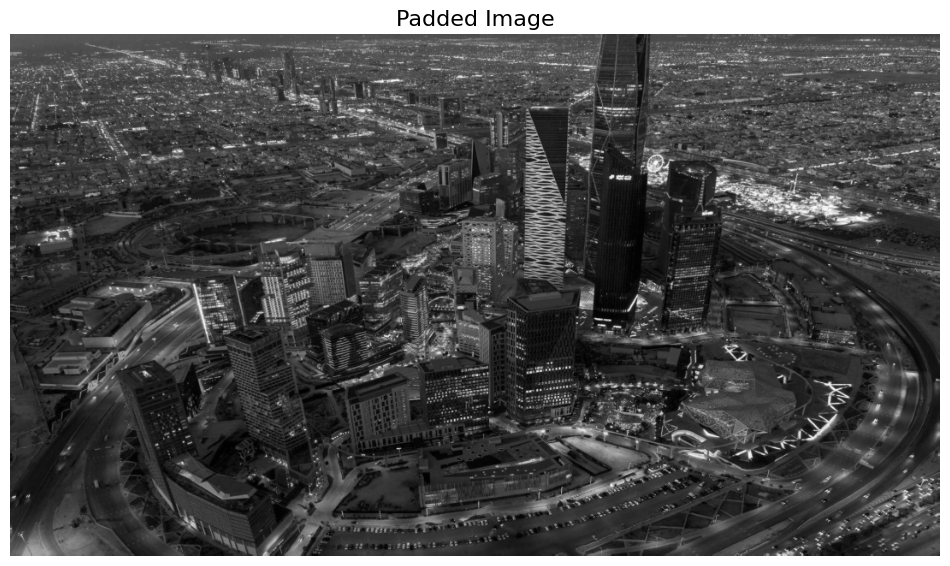

Original Image Shape: (608, 1085)
Padded Image Shape: (610, 1087)


In [26]:
filter_size = 3
pad_size = filter_size // 2

padded_image = np.pad(gray_image, pad_size, mode='edge')

plt.figure(figsize=(12, 12))
plt.imshow(padded_image, cmap='gray')
plt.title("Padded Image", fontsize=16)
plt.axis("off")
plt.show()

print("Original Image Shape:", gray_image.shape)
print("Padded Image Shape:", padded_image.shape)


In [27]:
box_filter = np.ones((3, 3)) / 9
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


In [28]:
def apply_filter(image, kernel):
    h, w = image.shape
    k_size = kernel.shape[0]
    padded_image = np.pad(image, k_size // 2, mode='edge')
    output_image = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            region = padded_image[i:i + k_size, j:j + k_size]
            output_image[i, j] = np.sum(region * kernel)

    return np.clip(output_image, 0, 255).astype(np.uint8)


In [29]:
filtered_images = {
    "Smoothed": apply_filter(gray_image, box_filter),
    "Edges (Sobel X)": apply_filter(gray_image, sobel_x),
    "Sharpened": apply_filter(gray_image, sharpen_filter)
}


In [30]:
cv2.imwrite("original.jpg", gray_image)
cv2.imwrite("smoothed.jpg", filtered_images["Smoothed"])
cv2.imwrite("edges_x.jpg", filtered_images["Edges (Sobel X)"])
cv2.imwrite("sharpened.jpg", filtered_images["Sharpened"])

print(" تم حفظ الصور بنجاح!")


 تم حفظ الصور بنجاح!


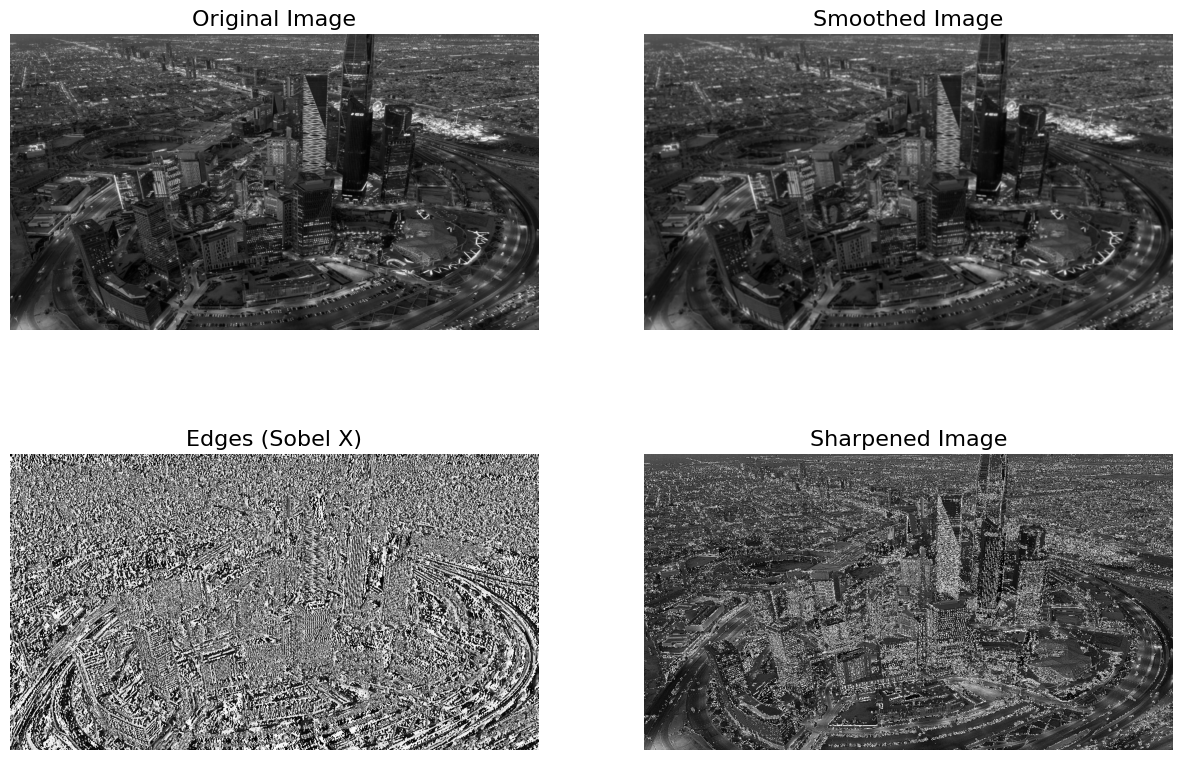

In [31]:
titles = ["Original Image", "Smoothed Image", "Edges (Sobel X)", "Sharpened Image"]
images = [gray_image, filtered_images["Smoothed"], filtered_images["Edges (Sobel X)"], filtered_images["Sharpened"]]

plt.figure(figsize=(15, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=16)
    plt.axis("off")

plt.show()


In [32]:
from google.colab import files

files.download("original.jpg")
files.download("smoothed.jpg")
files.download("edges_x.jpg")
files.download("sharpened.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>